# Retirada dos dados do Arduino

In [29]:
import serial
import time
import os

def conectar_bluetooth():
    porta = 'COM8'
    taxa_bauds = 9600
    try:
        conexao = serial.Serial(porta, taxa_bauds)
        print("Conectado à ESP32.")
        return conexao
    except Exception as e:
        print(f"Erro ao conectar: {e}")
        return None

def criar_pastas():
    os.makedirs("Dados", exist_ok=True)
    os.makedirs("Concatenados", exist_ok=True)

def receber_arquivos(conexao):
    criar_pastas()
    print("Aguardando arquivos...")
    arquivo_atual = None
    while True:
        linha = conexao.readline().decode().strip()
        
        if linha == "FIM_TRANSFERENCIA":
            print("Transferência concluída.")
            if arquivo_atual:
                arquivo_atual.close()
            break
        elif linha.startswith("ECG_") and linha.endswith(".txt"):
            if arquivo_atual:
                arquivo_atual.close()
            nome_arquivo = os.path.join("Dados", linha)
            print(f"Recebendo arquivo: {nome_arquivo}")
            arquivo_atual = open(nome_arquivo, 'w')
        elif linha == "FIM_ARQUIVO":
            print("Arquivo recebido.")
            if arquivo_atual:
                arquivo_atual.close()
                arquivo_atual = None
        else:
            if arquivo_atual:
                arquivo_atual.write(linha + '\n')

def concatenar_arquivos():
    arquivos_dados = sorted(os.listdir("Dados"))
    caminho_concatenado = os.path.join("Concatenados", "ECG_Concatenado.txt")
    
    with open(caminho_concatenado, 'w') as arquivo_concatenado:
        header_incluido = False
        for nome_arquivo in arquivos_dados:
            with open(os.path.join("Dados", nome_arquivo), 'r') as arquivo:
                for idx, linha in enumerate(arquivo):
                    if idx == 0 and not header_incluido:
                        arquivo_concatenado.write(linha)  # Escreve cabeçalho no início
                        header_incluido = True
                    elif idx != 0:
                        arquivo_concatenado.write(linha)  # Pula cabeçalho dos próximos arquivos
    print(f"Arquivo concatenado salvo em: {caminho_concatenado}")

def enviar_comando(conexao, comando):
    conexao.write(comando.encode())
    time.sleep(1)  # Pausa para garantir que o comando seja enviado

def main():
    conexao = conectar_bluetooth()
    if conexao:
        enviar_comando(conexao, '1')  # Envia comando '1' para iniciar a transferência
        receber_arquivos(conexao)
        conexao.close()
        concatenar_arquivos()

if __name__ == "__main__":
    main()


Conectado à ESP32.
Aguardando arquivos...
Recebendo arquivo: Dados\ECG_1.txt
Arquivo recebido.
Recebendo arquivo: Dados\ECG_2.txt
Arquivo recebido.
Recebendo arquivo: Dados\ECG_3.txt
Arquivo recebido.
Recebendo arquivo: Dados\ECG_4.txt
Arquivo recebido.
Recebendo arquivo: Dados\ECG_5.txt
Arquivo recebido.
Recebendo arquivo: Dados\ECG_6.txt
Arquivo recebido.
Recebendo arquivo: Dados\ECG_7.txt
Arquivo recebido.
Recebendo arquivo: Dados\ECG_8.txt
Arquivo recebido.
Recebendo arquivo: Dados\ECG_9.txt
Arquivo recebido.
Recebendo arquivo: Dados\ECG_10.txt
Arquivo recebido.
Recebendo arquivo: Dados\ECG_11.txt
Arquivo recebido.
Transferência concluída.
Arquivo concatenado salvo em: Concatenados\ECG_Concatenado.txt


## Script do Neurokit2

In [1]:
# Load NeuroKit and other useful packages
import neurokit2 as nk
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Note: this cell is hidden using the "remove-input" tag
# Make bigger images
plt.rcParams['figure.figsize'] = [15, 5]  
plt.rcParams['font.size']= 14

In [51]:
tempo_ms = []
sinal_n = []

with open('Dados/ECG_7.TXT', 'r') as file:
    # Ignora o cabeçalho
    next(file)
    
    for linha in file:
        linha = linha.strip()
        if linha:
            # Separa os valores usando a vírgula como delimitador
            tempo, leitura = linha.split(',')
            # Adiciona os valores nas listas convertendo para os tipos corretos
            tempo_ms.append(int(tempo))
            sinal_n.append(int(leitura))

print("Tempo(ms):", tempo_ms)
print("Leitura(ECG):", sinal_n)


Tempo(ms): [8, 16, 23, 31, 38, 46, 54, 61, 69, 77, 84, 92, 99, 111, 119, 127, 134, 142, 149, 157, 165, 172, 180, 201, 209, 217, 224, 232, 240, 247, 255, 263, 270, 278, 286, 293, 301, 308, 316, 324, 331, 339, 347, 354, 362, 370, 377, 385, 392, 400, 408, 415, 423, 431, 438, 446, 454, 461, 469, 476, 484, 492, 499, 507, 515, 522, 530, 537, 545, 675, 685, 706, 714, 721, 729, 737, 744, 752, 760, 767, 775, 782, 790, 798, 806, 813, 821, 828, 836, 844, 851, 859, 867, 874, 882, 889, 897, 905, 912, 920, 928, 935, 943, 951, 958, 966, 973, 981, 989, 996, 1004, 1012, 1019, 1027, 1035, 1042, 1050, 1057, 1065, 1073, 1080, 1088, 1096, 1103, 1111, 1121, 1128, 1136, 1144, 1151, 1159, 1303, 1311, 1318, 1326, 1333, 1341, 1349, 1357, 1364, 1372, 1379, 1387, 1395, 1402, 1410, 1418, 1425, 1433, 1440, 1448, 1456, 1463, 1471, 1479, 1486, 1494, 1502, 1509, 1517, 1524, 1532, 1540, 1547, 1555, 1563, 1570, 1578, 1586, 1593, 1601, 1608, 1616, 1624, 1631, 1639, 1649, 1779, 1786, 1807, 1815, 1823, 1830, 1838, 1845, 18

In [6]:
sinal_n = []

with open('Concatenados/ANDRE16.TXT', 'r') as file:
    for linha in file:
        linha = linha.strip()
        sinal_n.append(linha)

sinal_n = [int(x) for x in sinal_n]

#time1 = [x / 1000 for x in time1]

print(sinal_n)


[17649, 17858, 17733, 17444, 16852, 15957, 14882, 13681, 12639, 11882, 11401, 11048, 10986, 10919, 10992, 11116, 11276, 11350, 11423, 11516, 11609, 11592, 11568, 11582, 11695, 11838, 11772, 11787, 11822, 11855, 11911, 11906, 11708, 11710, 12022, 12413, 12738, 12983, 12883, 12835, 12778, 12519, 12321, 12155, 12171, 12186, 12084, 11845, 12731, 16314, 21438, 24999, 15121, 6763, 8970, 10274, 11547, 12471, 12963, 13135, 13374, 13554, 13761, 13909, 14000, 14190, 14366, 14671, 14872, 15297, 15623, 16103, 16523, 17088, 17645, 17755, 17681, 17694, 17441, 17013, 16116, 15040, 13912, 12862, 12044, 11514, 11255, 11136, 11019, 11022, 11168, 11292, 11482, 11446, 11587, 11645, 11659, 11682, 11770, 11822, 11854, 11827, 11805, 11787, 11836, 11895, 11784, 11766, 11888, 12288, 12643, 12974, 13033, 12977, 12898, 12823, 12576, 12386, 12191, 12195, 12305, 12142, 11900, 13755, 18104, 23469, 24004, 11019, 7368, 9341, 10422, 11676, 12567, 12924, 13104, 13268, 13576, 13779, 13937, 14083, 14332, 14626, 14789, 14

In [ ]:
# Automatically process the (raw) ECG signal
signals, info = nk.ecg_process(sinal_n, sampling_rate=120)

In [12]:
# Extract clean ECG and R-peaks location
rpeaks = info["ECG_R_Peaks"]
cleaned_ecg = signals["ECG_Clean"]

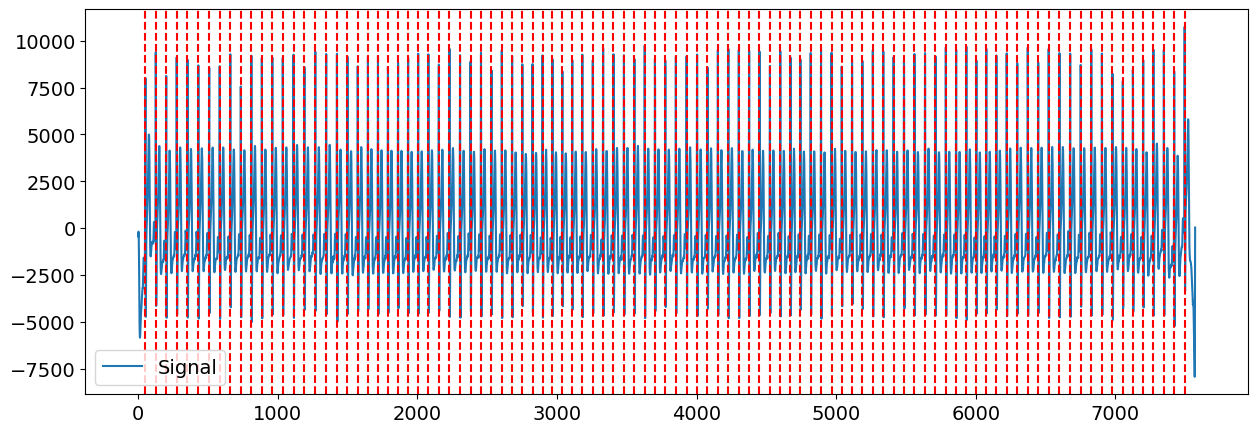

In [13]:
# Visualize R-peaks in ECG signal
plot = nk.events_plot(rpeaks, cleaned_ecg)

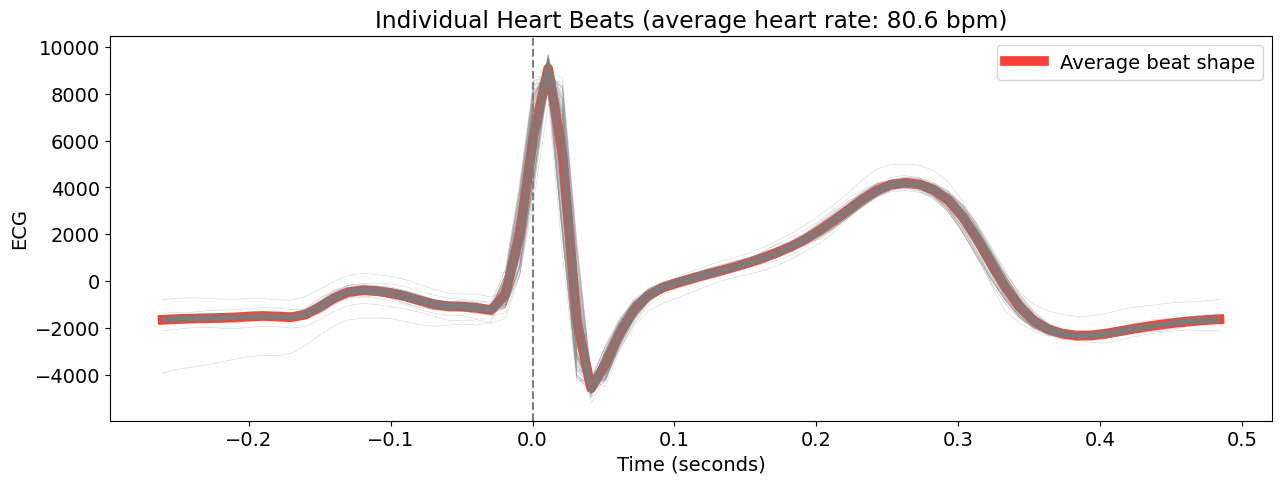

In [15]:
# Plotting all the heart beats
epochs = nk.ecg_segment(cleaned_ecg, rpeaks=None, sampling_rate=100, show=True)

# Novas Analises

## Leitura e Processamento dos Dados de ECG

Nesta etapa, lemos o arquivo de dados de ECG em formato `.txt`, que contém duas colunas: uma com o tempo em milissegundos e outra com as leituras de ECG em valores inteiros. Esses dados são essenciais para garantir que temos um histórico completo e preciso dos sinais ao longo de 1 minuto. Após carregar as informações, calculamos a taxa de amostragem, ou `sample rate`, que indica a frequência com que as amostras foram capturadas.

A **taxa de amostragem** é calculada com base na média dos intervalos de tempo entre cada leitura, usando a fórmula:

$$ \text{sr} = \frac{1000}{\text{intervalo médio em ms}} $$

Onde `sr` é a taxa de amostragem em Hz (amostras por segundo). Esse valor é crucial para análises precisas, pois garante que todas as funções e algoritmos interpretem corretamente o intervalo de tempo entre as amostras.

## Para os dados novos

In [77]:
# Listas para armazenar tempo (em ms) e as leituras de ECG
tempo_ms = []
sinal_n = []

arq_concat = 'Concatenados/ECG_Concatenado.txt'
arq_normal = 'Dados/ECG_5.txt'

# Leitura do arquivo, ignorando o cabeçalho e dividindo os dados em colunas
with open(arq_normal, 'r') as file:
    # Ignora o cabeçalho
    next(file)
    
    for linha in file:
        linha = linha.strip()
        if linha:
            # Separa os valores usando a vírgula como delimitador
            tempo, leitura = linha.split(',')
            # Adiciona os valores nas listas convertendo para os tipos corretos
            tempo_ms.append(int(tempo))
            sinal_n.append(int(leitura))


# Cálculo da taxa de amostragem (sample rate)
# Calcula a diferença média entre os tempos (em ms) e converte para Hz (amostras por segundo)
intervalo_medio = np.mean(np.diff(tempo_ms))  # Intervalo médio em milissegundos
sr = 1000 / intervalo_medio  # Converte para amostras por segundo

# Exibe a taxa de amostragem e as primeiras linhas dos dados para conferência
print(f"Sample Rate calculado (sr): {sr:.2f} Hz")
print("Tempo(ms):", tempo_ms)
print("Leitura(ECG):", sinal_n)

# Processa automaticamente o sinal de ECG bruto
signals, info = nk.ecg_process(sinal_n, sampling_rate=sr)

# Extrai o sinal limpo de ECG e a localização dos picos R
rpeaks = info["ECG_R_Peaks"]
cleaned_ecg = signals["ECG_Clean"]


Sample Rate calculado (sr): 88.28 Hz
Tempo(ms): [8, 16, 23, 31, 39, 46, 54, 62, 69, 77, 84, 92, 100, 112, 119, 127, 134, 142, 150, 157, 165, 173, 180, 201, 209, 217, 224, 232, 240, 247, 255, 263, 270, 278, 285, 293, 301, 308, 316, 324, 331, 339, 346, 354, 362, 369, 377, 385, 392, 400, 408, 415, 423, 430, 438, 446, 453, 461, 469, 476, 484, 492, 622, 630, 637, 645, 652, 660, 668, 678, 685, 707, 714, 722, 729, 737, 745, 752, 760, 768, 775, 783, 790, 798, 806, 814, 821, 829, 836, 844, 852, 859, 867, 875, 882, 890, 897, 905, 913, 920, 928, 936, 943, 951, 959, 966, 974, 981, 989, 997, 1004, 1012, 1020, 1027, 1035, 1043, 1050, 1058, 1065, 1073, 1081, 1088, 1096, 1104, 1114, 1121, 1129, 1136, 1144, 1152, 1295, 1302, 1310, 1318, 1325, 1333, 1340, 1348, 1356, 1364, 1371, 1379, 1386, 1394, 1402, 1409, 1417, 1425, 1432, 1440, 1448, 1455, 1463, 1470, 1478, 1486, 1493, 1501, 1509, 1516, 1524, 1531, 1539, 1547, 1554, 1562, 1570, 1577, 1585, 1593, 1600, 1608, 1615, 1623, 1631, 1641, 1770, 1778, 1799, 

## Para os dados antigos

In [60]:
# Carrega o sinal do arquivo
sinal_n = []
duracao_minutos = 1  # Cada arquivo representa 1 minuto
caminho1 = 'Concatenados/ANDRE16.TXT'
caminho2 = 'Dados/ECG_1.txt'

with open(caminho1, 'r') as file:
    for linha in file:
        linha = linha.strip()
        sinal_n.append(int(linha))

# Calcula a frequência de amostragem com base no número total de amostras e duração
numero_amostras = len(sinal_n)
sr = numero_amostras / (duracao_minutos * 60)  # Sample rate em Hz

print(f"Frequência de amostragem calculada: {sr} Hz")

# Processa automaticamente o sinal de ECG bruto
signals, info = nk.ecg_process(sinal_n, sampling_rate=sr)

# Extrai o sinal limpo de ECG e a localização dos picos R
rpeaks = info["ECG_R_Peaks"]
cleaned_ecg = signals["ECG_Clean"]


Frequência de amostragem calculada: 126.2 Hz


## Analises

## Filtragem e Limpeza do Sinal de ECG

Após obtermos a taxa de amostragem, realizamos a **limpeza do sinal de ECG**. Esse processo é essencial para remover ruídos indesejados que podem estar presentes no sinal bruto, como interferências de movimento e ruídos de fundo. 

Durante a limpeza, o sinal passa por filtros que removem componentes de alta frequência, deixando apenas as frequências relevantes para a análise do ECG. O sinal limpo é então utilizado nas próximas etapas, onde detectamos as ondas características do ECG e realizamos medições importantes.


## Identificação dos Picos R e Cálculo da Frequência Cardíaca

Um dos principais elementos de interesse no ECG são os **picos R**, que representam o momento de contração máxima dos ventrículos do coração. Esses picos são detectados automaticamente no sinal limpo e são utilizados para calcular a frequência cardíaca ao longo do tempo.

A **frequência cardíaca** em batimentos por minuto (bpm) é calculada a partir dos intervalos entre os picos R (conhecidos como intervalos RR). A fórmula para calcular a frequência cardíaca a partir de um intervalo RR (em segundos) é:

$$ \text{Frequência Cardíaca (bpm)} = \frac{60}{\text{Intervalo RR}} $$

Essa análise permite avaliar o ritmo cardíaco do indivíduo, sendo uma medida fundamental para monitorar a saúde cardíaca.

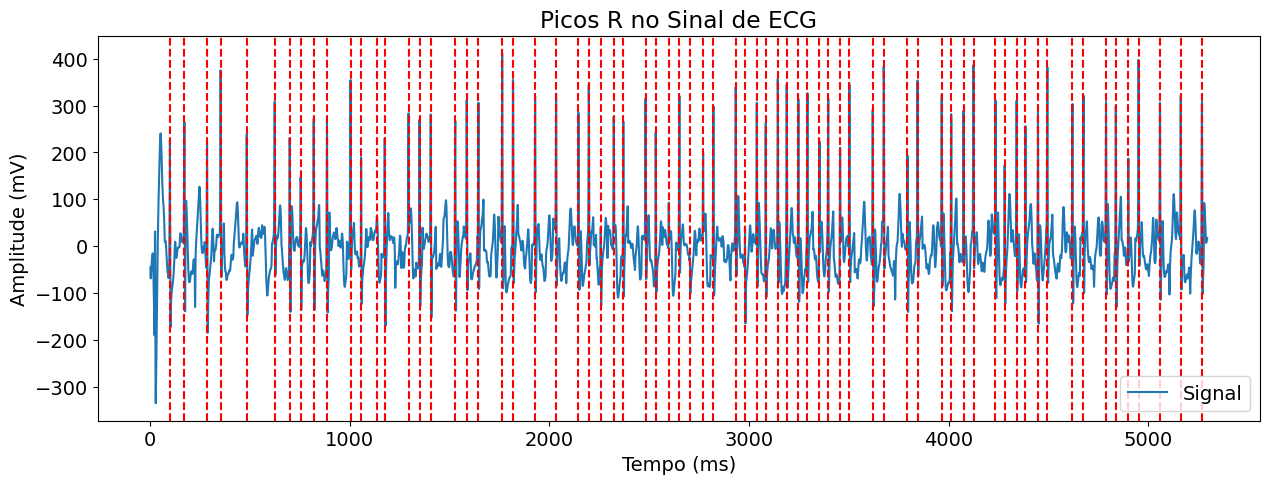

In [78]:
import neurokit2 as nk
import matplotlib.pyplot as plt

# Visualizar picos R no sinal de ECG
nk.events_plot(rpeaks, cleaned_ecg)
plt.title("Picos R no Sinal de ECG")
plt.xlabel("Tempo (ms)")
plt.ylabel("Amplitude (mV)")
plt.show()


## Análise da Variabilidade da Frequência Cardíaca (HRV ou VFC)

A **variabilidade da frequência cardíaca (HRV)** é uma medida que indica como o intervalo entre batimentos varia ao longo do tempo. Para realizar essa análise, calculamos a diferença entre intervalos RR consecutivos e avaliamos a distribuição desses valores.

A HRV é um importante indicador de saúde cardíaca e do sistema nervoso autônomo. Em geral, uma maior variabilidade indica um sistema cardiovascular saudável e resiliente, enquanto uma variabilidade reduzida pode ser um sinal de estresse ou de problemas cardíacos. Existem vários métodos para calcular a HRV, incluindo análise no domínio do tempo e no domínio da frequência.

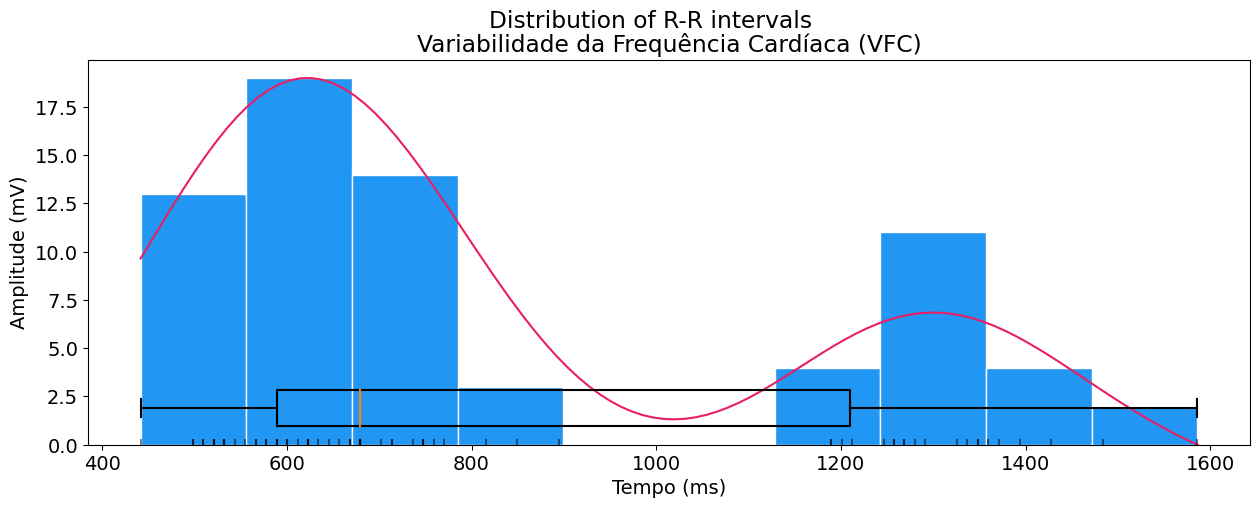

In [79]:
# Análise de Variabilidade da Frequência Cardíaca (VFC) em domínio de tempo
hrv = nk.hrv_time(rpeaks, sampling_rate=sr, show=True)
plt.title("Variabilidade da Frequência Cardíaca (VFC)")
plt.xlabel("Tempo (ms)")
plt.ylabel("Amplitude (mV)")
plt.show()


## Segmentação das Ondas P, QRS e T

Além dos picos R, o ECG possui outras ondas importantes que representam diferentes fases do ciclo cardíaco:

- **Onda P**: Representa a despolarização dos átrios, indicando que os átrios estão se contraindo.
- **Complexo QRS**: Representa a despolarização dos ventrículos, ou seja, a contração dos ventrículos.
- **Onda T**: Representa a repolarização dos ventrículos, que é o relaxamento após a contração.

A segmentação das ondas P, QRS e T é realizada para entender o comportamento detalhado do coração em cada fase do ciclo. Esta análise permite identificar possíveis anomalias no ciclo cardíaco, como variações na duração do complexo QRS ou alterações na amplitude das ondas, que podem ser indicativos de condições cardíacas.

c:\Users\andre23035\.conda\envs\pyecg\lib\site-packages\neurokit2\ecg\ecg_plot.py:73: NeuroKitWarning: 'info' dict not provided. Some information might be missing. Sampling rate will be set to 1000 Hz.
  category=NeuroKitWarning,
c:\Users\andre23035\.conda\envs\pyecg\lib\site-packages\pandas\core\frame.py:5244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


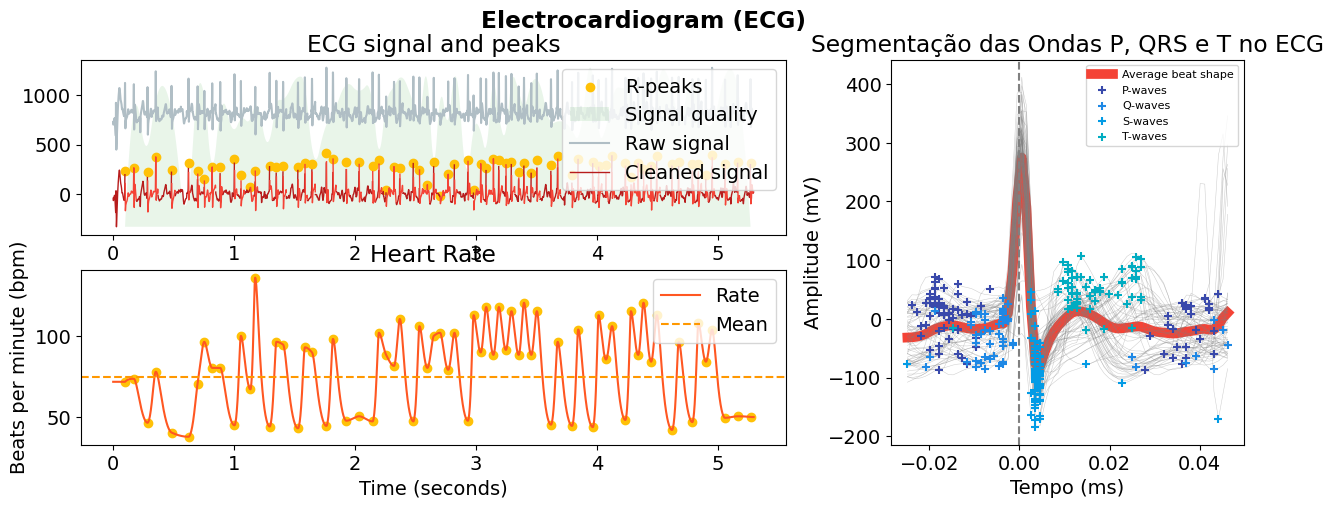

In [80]:
# Segmentação das ondas P, QRS e T
waves = nk.ecg_delineate(cleaned_ecg, rpeaks, sampling_rate=80, method="dwt")

# Visualização do sinal com a segmentação das ondas
nk.ecg_plot(signals)  # Remove o argumento sampling_rate
plt.title("Segmentação das Ondas P, QRS e T no ECG")
plt.xlabel("Tempo (ms)")
plt.ylabel("Amplitude (mV)")

# Reduz o tamanho da fonte da legenda
plt.legend(fontsize=8)  # Ajuste o valor para um tamanho adequado, como 8 ou 10
plt.show()


## Detecção de Anomalias e Possíveis Arritmias

A **detecção de anomalias nos intervalos RR** é realizada para identificar possíveis arritmias cardíacas. Arritmias são alterações nos intervalos entre batimentos cardíacos, que podem indicar problemas como:

- **Bradicardia**: Intervalos RR maiores que o esperado, indicando frequência cardíaca lenta.
- **Taquicardia**: Intervalos RR menores que o esperado, indicando frequência cardíaca acelerada.
- **Intervalos Anômalos**: Intervalos RR que fogem muito do padrão podem indicar uma arritmia ou outros problemas cardíacos.

Para detectar anomalias, verificamos se o intervalo RR está fora dos limites normais, como intervalos menores que 0.6 segundos ou maiores que 1.2 segundos. Esses limites são baseados em parâmetros comuns de variação cardíaca e ajudam a sinalizar quando o ritmo cardíaco está fora do esperado.

In [81]:
import numpy as np

# Detecção de arritmias usando variabilidade do intervalo RR
rr_intervals = np.diff(rpeaks) / sr  # Converte para segundos
anomalous_intervals = rr_intervals[(rr_intervals < 0.6) | (rr_intervals > 1.2)]
if len(anomalous_intervals) > 0:
    print(f"Atenção: {len(anomalous_intervals)} intervalos anômalos detectados.")
else:
    print("Nenhuma anomalia nos intervalos RR detectada.")


Atenção: 39 intervalos anômalos detectados.


## Análise Espectral da Variabilidade da Frequência Cardíaca (HRV)

A **análise espectral da HRV** envolve a decomposição dos intervalos RR em diferentes faixas de frequência. Essas faixas de frequência são associadas a diferentes componentes do sistema nervoso autônomo:

1. **Ultra Low Frequency (ULF)**: Componentes muito lentos, associados a processos de longo prazo e mudanças metabólicas.
2. **Very Low Frequency (VLF)**: Associada a atividades fisiológicas de longo prazo e ao sistema renina-angiotensina.
3. **Low Frequency (LF)**: Frequentemente associada à atividade do sistema nervoso simpático e pode indicar níveis de estresse ou excitação.
4. **High Frequency (HF)**: Associada ao sistema nervoso parassimpático e à respiração. Este componente reflete a resposta do coração ao sistema respiratório (atividade vagal).
5. **Very High Frequency (VHF)**: Representa componentes de altíssima frequência, geralmente negligenciados nas análises clínicas.

Ao realizar a análise espectral, conseguimos entender melhor a influência de cada componente do sistema nervoso autônomo na frequência cardíaca. A potência em cada faixa é representada no gráfico, e podemos observar qual sistema está mais ativo.

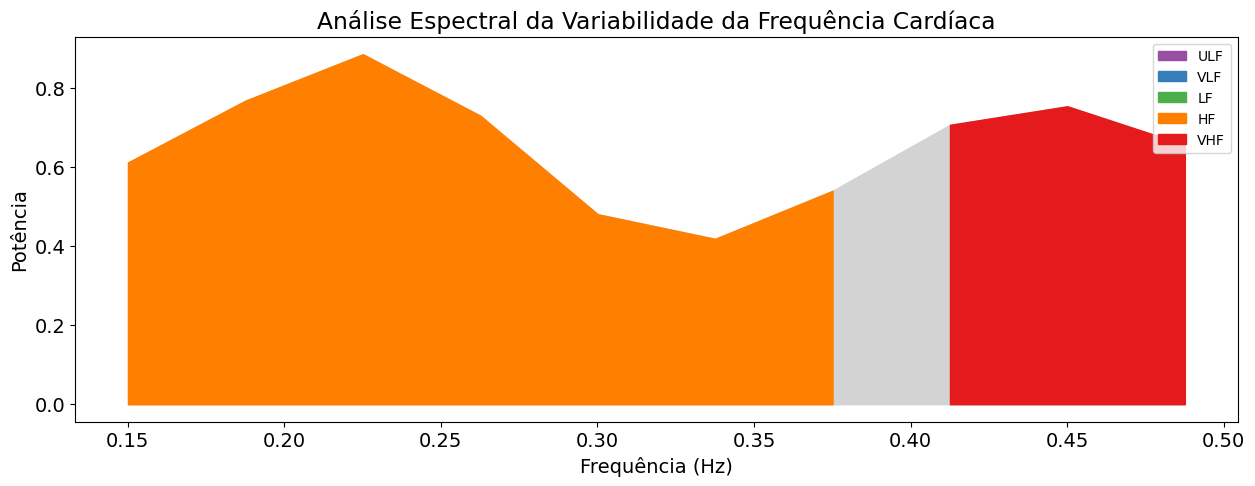

In [82]:
# Análise espectral da VFC
hrv_freq = nk.hrv_frequency(rpeaks, sampling_rate=sr, show=True)
plt.title("Análise Espectral da Variabilidade da Frequência Cardíaca")
plt.xlabel("Frequência (Hz)")
plt.ylabel("Potência")
plt.show()
